<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Обзор-данных" data-toc-modified-id="1.-Обзор-данных-1">1. Обзор данных</a></span><ul class="toc-item"><li><span><a href="#1.1-Выводы" data-toc-modified-id="1.1-Выводы-1.1">1.1 Выводы</a></span></li></ul></li><li><span><a href="#2.-Предобработка-данных" data-toc-modified-id="2.-Предобработка-данных-2">2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#2.1-Поиск-и-удаление-дубликатов" data-toc-modified-id="2.1-Поиск-и-удаление-дубликатов-2.1">2.1 Поиск и удаление дубликатов</a></span></li><li><span><a href="#2.2-Исправление-аномалий" data-toc-modified-id="2.2-Исправление-аномалий-2.2">2.2 Исправление аномалий</a></span></li><li><span><a href="#2.3-Заполнение-пропусков" data-toc-modified-id="2.3-Заполнение-пропусков-2.3">2.3 Заполнение пропусков</a></span></li><li><span><a href="#2.4-Прочие-преобразования" data-toc-modified-id="2.4-Прочие-преобразования-2.4">2.4 Прочие преобразования</a></span></li></ul></li><li><span><a href="#3.-Выбор-модели" data-toc-modified-id="3.-Выбор-модели-3">3. Выбор модели</a></span><ul class="toc-item"><li><span><a href="#3.1-Выбор-модели-без-учета-дисбаланса-классов" data-toc-modified-id="3.1-Выбор-модели-без-учета-дисбаланса-классов-3.1">3.1 Выбор модели без учета дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#3.1.1-Логистическая-регрессия" data-toc-modified-id="3.1.1-Логистическая-регрессия-3.1.1">3.1.1 Логистическая регрессия</a></span></li><li><span><a href="#3.1.2-Случайный-лес" data-toc-modified-id="3.1.2-Случайный-лес-3.1.2">3.1.2 Случайный лес</a></span></li><li><span><a href="#3.1.3-Выводы" data-toc-modified-id="3.1.3-Выводы-3.1.3">3.1.3 Выводы</a></span></li></ul></li><li><span><a href="#3.2-Выбор-модели-c-учетом-дисбаланса-классов" data-toc-modified-id="3.2-Выбор-модели-c-учетом-дисбаланса-классов-3.2">3.2 Выбор модели c учетом дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#3.2.1-Логистическая-регрессия" data-toc-modified-id="3.2.1-Логистическая-регрессия-3.2.1">3.2.1 Логистическая регрессия</a></span></li><li><span><a href="#3.2.2-Случайный-лес" data-toc-modified-id="3.2.2-Случайный-лес-3.2.2">3.2.2 Случайный лес</a></span></li><li><span><a href="#3.2.3-Выводы" data-toc-modified-id="3.2.3-Выводы-3.2.3">3.2.3 Выводы</a></span></li></ul></li></ul></li><li><span><a href="#4.-Тестирование-модели" data-toc-modified-id="4.-Тестирование-модели-4">4. Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#4.1-Выводы" data-toc-modified-id="4.1-Выводы-4.1">4.1 Выводы</a></span></li></ul></li><li><span><a href="#5.-Общий-вывод" data-toc-modified-id="5.-Общий-вывод-5">5. Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6">Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

***Описание проекта***

Заказчик этого исследования - «Бета-Банк», который столкнулся с оттоком клиентов. Чтобы предупредить отток в дальнейшем нам необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

Для целей прогнозирования мы создадим модель бинарной классификации на основе данных о поведении клиентов и расторжении договоров с банком.

***Цели исследования***

- Построить модель с предельно большим значением метрики *F1*, но не менее 0.59
- Дополнительно проконтролировать значение метрики *AUC-ROC* 

*Ссылка на репозиторий в GitHub: https://github.com/romul771/Bank-Clients-Churn.git*

## 1. Обзор данных

Импортируем библиотеки, необходимые для дальнейшего анализа, и зададим начальное значение генератора случайных чисел (для воспроизводимости результатов, в том числе при применении инструментов из библиотеки `sklearn`):

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.utils import shuffle, resample
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline
from imblearn import FunctionSampler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Set seed value for reproducibility
SEED_VALUE = 12345

Прочитаем файл `Churn.csv`, содержащий информацию о поведении клиентов и сохраним полученную таблицу в переменной `df`:

In [2]:
# Read and save data (set 1st column as index)
df = pd.read_csv('Churn.csv', index_col=0)

Выведем 10 случайных строк таблицы на экран:

In [3]:
# Change float format display settings 
pd.options.display.float_format = "{:,.2f}".format

# Remove row index name
df = df.rename_axis(index=None)

# Show 10 random rows of the table
df.sample(10, random_state=SEED_VALUE)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7868,15697201,Yocum,640,Spain,Female,46,3.00,0.00,1,1,1,"156,260.08",0
1403,15613282,Vorobyova,757,France,Male,29,8.00,"130,306.49",1,1,0,"77,469.38",0
8607,15694581,Rawlings,807,Spain,Male,42,5.00,0.00,2,1,1,"74,900.90",0
8886,15815125,Michael,668,Spain,Male,45,4.00,"102,486.21",2,1,1,"158,379.25",0
6495,15752846,Pinto,699,France,Male,28,7.00,0.00,2,1,1,"22,684.78",0
9629,15596624,Topp,662,France,Female,22,9.00,0.00,2,1,1,"44,377.65",0
7460,15583724,Raymond,645,Spain,Female,29,4.00,0.00,2,1,1,"74,346.11",0
3965,15714981,Sabbatini,476,France,Male,37,4.00,0.00,1,1,1,"55,775.84",1
7001,15739548,Johnson,775,France,Male,28,9.00,"111,167.70",1,1,0,"149,331.01",0
4471,15593795,Linton,516,Germany,Female,53,NaN,"156,674.20",1,1,0,"118,502.34",1


Согласно документации в таблице представлены следующие данные:

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата
- `Exited` — факт ухода клиента

Данные в столбце `Exited` будут использоваться в качестве целевого признака, а остальные данные в качестве признаков (независимых переменных) для бинарной классификации. Каких-то особых аномалий или пропусков пока не видно. 

Сначала проверим есть ли все-таки пропуски и какие типы данных используются:

In [4]:
# Print data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


В таблице 13 столбцов типов - `int64`(7), `float64`(3) и `object`(3). Размер выборки - 10 тыс. клиентов. Пропуски есть только в столбце `Tenure`, в нем пропущено около 10% значений. 

Посмотрим более внимательно на количественные признаки в таблице при помощи метода `describe`: 

In [5]:
# Define numerical data columns
columns_num = ['CreditScore', 'Age', 'Tenure', 
               'Balance', 'NumOfProducts', 'EstimatedSalary']

# Generate descriptive statistics for numerical data
df[columns_num].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,"10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,5.00,"76,485.89",1.53,"100,090.24"
std,96.65,10.49,2.89,"62,397.41",0.58,"57,510.49"
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,2.00,0.00,1.00,"51,002.11"
50%,652.00,37.00,5.00,"97,198.54",1.00,"100,193.91"
75%,718.00,44.00,7.00,"127,644.24",2.00,"149,388.25"
max,850.00,92.00,10.00,"250,898.09",4.00,"199,992.48"


Отметим, следующее: 

- Довольно много (минимум 25%) счетов имеют нулевой баланс; 
- Мы не знаем в чем, и за какой период измерена "предполагаемая зарплата", но судя по странам проживания (см. 10 случайных строк таблицы выше) можем предположить, что зарплата указана в евро и вероятно за год (судя по суммам). В этом случае удивляет размер минимальной зарплаты, да и максимальная не очень высока. В последнем случае возможно, что клиенты с более высокой зарплатой обслуживаются в отделе *private banking*, и данные по ним не включены в выборку (хотя стоит отметить, что для обслуживания в *private banking* большее значение имеет остаток по счету). Но размер минимальной зарплаты это явно аномалия. Также отметим, что определение "предполагаемая" тоже не до конца понятно;
- Количество лет обслуживания ограничено 10 годами, возможно банк был создан относительно недавно, или опять же выборка ограничена по каким-то причинам;
- Количество продуктов имеет довольно ограниченный набор значений, поэтому возможно эту переменную стоит отнести к категориальным;
- Вероятно данные распределены относительно симметрично за исключением баланса счета (левая асимметрия) и количества продуктов (правая асимметрия). 

Посмотрим категориальные признаки:

In [6]:
# Define categorical data columns
columns_cat = ['CustomerId', 'Surname', 'Geography', 
               'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Generate descriptive statistics for categorical data
df[columns_cat].astype('category').describe()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000,10000
unique,10000,2932,3,2,2,2,2
top,15565701,Smith,France,Male,1,1,0
freq,1,32,5014,5457,7055,5151,7963


Отметим следующее:

- Все номера клиентов уникальны, то есть как минимум явных дубликатов в данных нет;
- География ограничивается 3 странами, и поскольку мы видели их все в таблице с 10 случайными строками, наше предположение о валюте зарплат скорее всего верно;
- Классы целевого признака несбалансированы - доля покинувших банк (класс `'1'`) около 20%. К сожалению для банка нельзя сказать, что дисбаланс очень серьезный, однако мы проверим, как он сказывается на качестве модели.

Наличие выбросов также может повлиять на качество модели, поэтому посмотрим на диаграммы размаха для количественных признаков: 

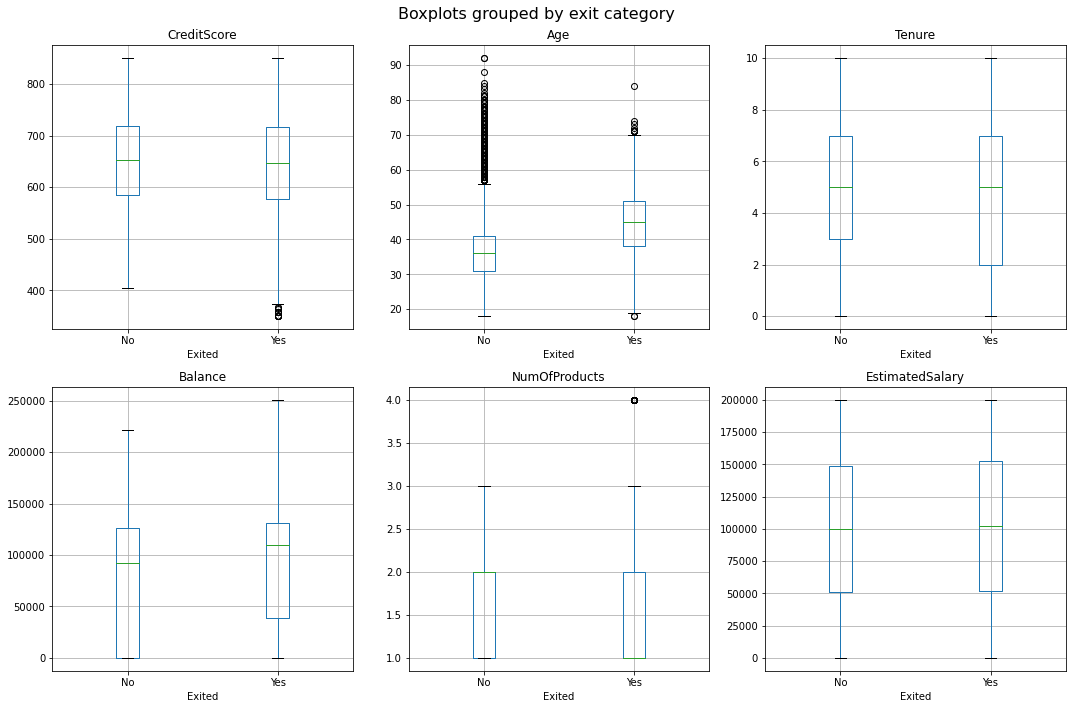

In [7]:
# Plot boxplots for selected columns (by exit category) 
plt.figure(figsize=(15, 10))
for index, column in enumerate(columns_num):
    ax = plt.subplot(2, 3, index + 1)   
    df.boxplot(column=column, by='Exited', ax=ax)
    plt.xlabel('Exited')    
    plt.xticks([1, 2], ['No', 'Yes'])
plt.suptitle('Boxplots grouped by exit category', fontsize=16)
plt.tight_layout()
plt.show()

Да, похоже нелегко будет и банку и модели. Банку потому, что уходят клиенты с бóльшим медианным балансом и зарплатой, а модели потому, что "нормальные" значения большинства количественных признаков одного класса "перекрывают" соответствующие значения другого класса, да и медианные значения довольно близко (кроме возраста и баланса). Также отметим, что только кредитный рейтинг, возраст и количество продуктов имеют выбросы и при этом, значения выбросов не являются аномальными. 

Посмотрим на гистограммы распределения:

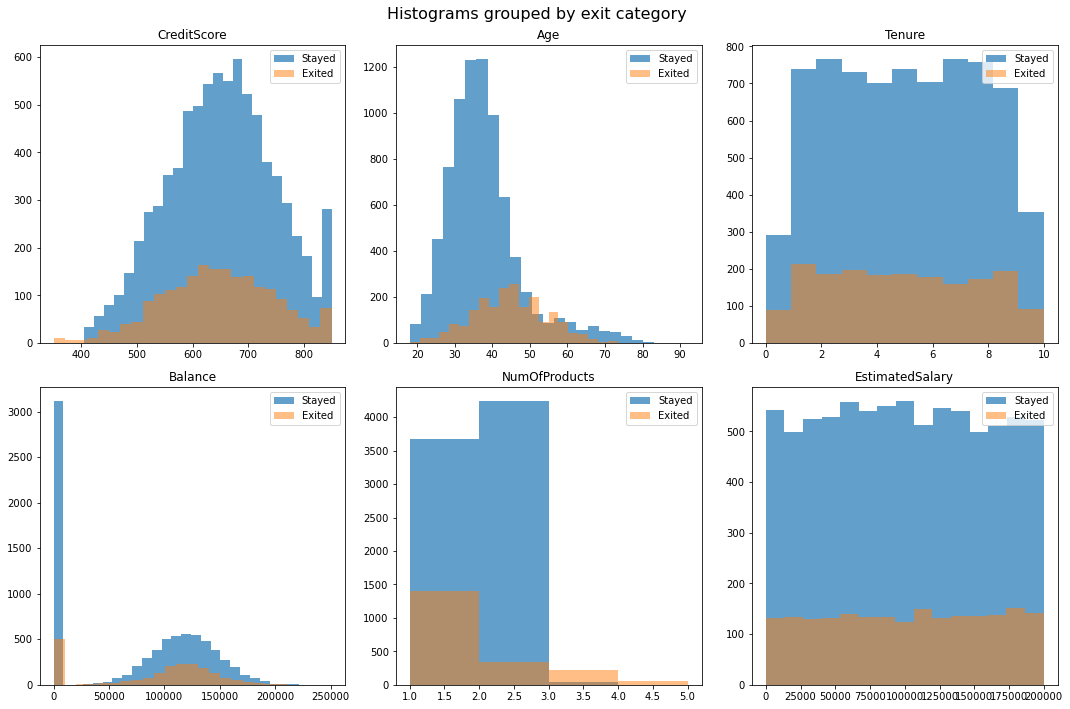

In [8]:
# Plot histograms for selected columns (by exit category) 
plt.figure(figsize=(15, 10))
for index, column in enumerate(columns_num):
    plt.subplot(2, 3, index + 1)
    plt.hist(df.query('Exited == 0')[column], 
             bins=[25, 25, 11, 25, [1, 2, 3, 4, 5], 15][index], 
             label='Stayed', alpha=0.7)
    plt.hist(df.query('Exited == 1')[column], 
             bins=[25, 25, 11, 25, [1, 2, 3, 4, 5], 15][index], 
             label='Exited', alpha=0.5)
    plt.legend()
    plt.title(column)
plt.suptitle('Histograms grouped by exit category', fontsize=16)
plt.tight_layout()
plt.show()

Наиболее близки к "нормальному" распределения кредитного рейтинга, возраста и баланса счета. При этом, распределение возраста имеет удлиненный правый хвост, а распределения кредитного рейтинга и баланса счета дополнительные значительные пики в районе максимального и минимального значений соответственно. Распределения зарплаты и количества лет обслуживания скорее близки к равномерному. При этом, у распределения количества лет обслуживания наблюдаются "провалы" в районе минимального и максимального значения (возможно это может быть связано с пропусками). Также удивляет форма распределения зарплаты, мы скорее ожидали увидеть что-то более близкое к "нормальному" распределению. И наконец распределение количества продуктов скорее ближе к распределению Пуассона. Однако, отметим, что для моделей классификации, которые мы будем применять в дальнейшем, "нормальность" распределения не является обязательным условием. Также отметим, что только распределения возраста и количества продуктов визуально отличаются (по средним и дисперсии), поэтому вероятно, что они будут довольно важны для классификации.       

В заключение проверим количественные признаки на мультиколлинеарность: 

In [9]:
# Calculate Pearson correlation for selected columns
df[columns_num].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.00,-0.00,-0.00,0.01,0.01,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tenure,-0.00,-0.01,1.00,-0.01,0.01,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,1.00


Коэффициенты корреляции низкие, соответственно мультиколлинеарность нам не грозит. 

### 1.1 Выводы

Для целей проекта мы будем использовать количественные и категориальные данные о 10 тыс. клиентов (независимые переменные) и расторжении ими договоров с банком (зависимая переменная). По нашей оценке данных достаточно для целей обучения модели. При этом отметим, что:

- В данных есть пропущенные значения
- Также возможно, что в данных есть аномальные значения
- Классы целевого признака несбалансированы 
- В некоторых независимых переменных есть выбросы
- При этом, сильной корреляции между независимыми переменными (мультиколлинеарность) мы не обнаружили 

С учетом вышесказанного перед тем, как перейти к выбору и обучению модели, нам необходимо предобработать данные. 

## 2. Предобработка данных 

### 2.1 Поиск и удаление дубликатов

Как мы отметили в предыдущем разделе, явных дубликатов в данных нет - все идентификационные номера уникальны. Однако, можно предположить, что одному и тому же клиенту могут присвоить разные номера, например, при переходе на обслуживание в другое отделение. Поэтому поищем скрытые дубликаты. Сначала приведем все фамилии к нижнему регистру и уберем наиболее часто встречающиеся знаки пунктуации и пробелы из начала и конца строки: 

In [10]:
# Convert 'Surname' to lower case 
# and strip leading/trailing whitespaces & certain characters 
df['Surname'] = df['Surname'].str.lower().str.strip('.!? \s')

Теперь посмотрим сколько потенциальных дубликатов есть если сравнивать только по основным характеристикам клиента:

In [11]:
# Count duplicated clients by selected columns
df.duplicated(subset=['Surname', 'Geography', 'Gender', 'Age']).sum()

244

Около 2.5% данных, в принципе не очень много. Выведем несколько потенциальных дубликатов на экран:

In [12]:
# Show first 10 rows of sorted duplicates by selected columns
df[df[['Surname', 'Geography', 'Gender', 'Age']]
   .duplicated(keep=False)].sort_values(by=['Surname']).head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8927,15709136,adam,620,France,Male,28,8.00,0.00,2,1,1,"199,909.32",0
3467,15631339,adam,791,France,Male,28,4.00,0.00,1,1,0,"174,435.48",0
8826,15797081,ajuluchukwu,611,Germany,Female,49,9.00,"115,488.52",2,1,1,"138,656.81",1
9784,15680430,ajuluchukwu,601,Germany,Female,49,4.00,"96,252.98",2,1,0,"104,263.82",0
3844,15677804,aliyeva,783,Spain,Male,38,1.00,0.00,3,1,1,"80,178.54",1
1853,15573741,aliyeva,698,Spain,Male,38,10.00,"95,010.92",1,1,1,"105,227.86",0
6049,15676433,allan,707,France,Female,36,6.00,0.00,1,0,0,"98,810.78",0
3243,15729908,allan,411,France,Female,36,10.00,0.00,1,0,0,"120,694.35",0
4539,15676835,anayolisa,710,Spain,Male,33,1.00,0.00,2,1,0,"168,313.17",0
8841,15646969,anayolisa,776,Spain,Male,33,2.00,0.00,2,1,1,"176,921.00",0


Интересно, какая вероятность, что в Германии проживает две женщины в возрасте 49 лет, ноcящих фамилию *Ajuluchukwu* (и обслуживающихся в одном, вероятно не очень большом, банке). Похоже, что дубликаты все-таки есть. Остальные признаки конечно отличаются, но это может быть связано с тем, что они отображают состояние на разные даты. Однако, перед тем, как удалить эти "дубликаты" посмотрим сколько "ушедших" мы удалим:   

In [13]:
# Count duplicates (all) who exited
df.loc[(df.duplicated(subset=['Surname', 'Geography', 'Gender', 'Age'])) 
       & (df['Exited'] == 1), 'CustomerId'].count()

33

Около 1.5%, что приемлемо, поэтому удалим "дубликаты":

In [14]:
# Drop duplicates
df = df.drop_duplicates(subset=['Surname', 'Geography', 'Gender', 'Age'])

### 2.2 Исправление аномалий 

В разделе 1 мы отметили очень низкий минимальный уровень зарплаты (предположительно годовой в евро). Предположим, что минимальный уровень зарплаты в рассматриваемых нами странах составляет около 1,000 евро в месяц. Посмотрим сколько клиентов получают меньше этого уровня:

In [15]:
# Count the number of clients with salary below 12k 
df.query('EstimatedSalary < 12000')['CustomerId'].count()

585

Более 5%, довольно много. Теперь посмотрим, сколько таких среди ушедших:

In [16]:
# Count the number of exited clients with salary below 12k 
df.query('EstimatedSalary < 12000 and Exited == 1')['CustomerId'].count()

112

Также более 5%. Это похоже на аномалию, возможно, где-то указаны зарплаты за месяц, а где-то есть просто ошибки / опечатки. Тем не менее, у нас нет данных для того чтобы исправить эту аномалию, а удалять 5% данных (особенно с учетом дисбаланса) не хотелось бы. Поэтому оставим зарплаты, как есть. 

### 2.3 Заполнение пропусков

Как отмечалось выше единственный столбец, в котором есть пропуски - `Tenure`, но при этом пропущено около 10% данных. Посмотрим у скольких ушедших пропущено это значение:  

In [17]:
# Count the number of exited clients with missing Tenure data 
df.query('Tenure.isna() and Exited == 1')['CustomerId'].count()

183

Также почти 10%, поэтому попробуем их заполнить. Но сначала посмотрим на гистограммы распределения признаков для наблюдений, в которых пропущен этот показатель. Если они будут очень сильно отличаться от гистограмм по всей выборке, то возможно это поможет нам понять в чем причина пропусков (и более правильно их заполнить):

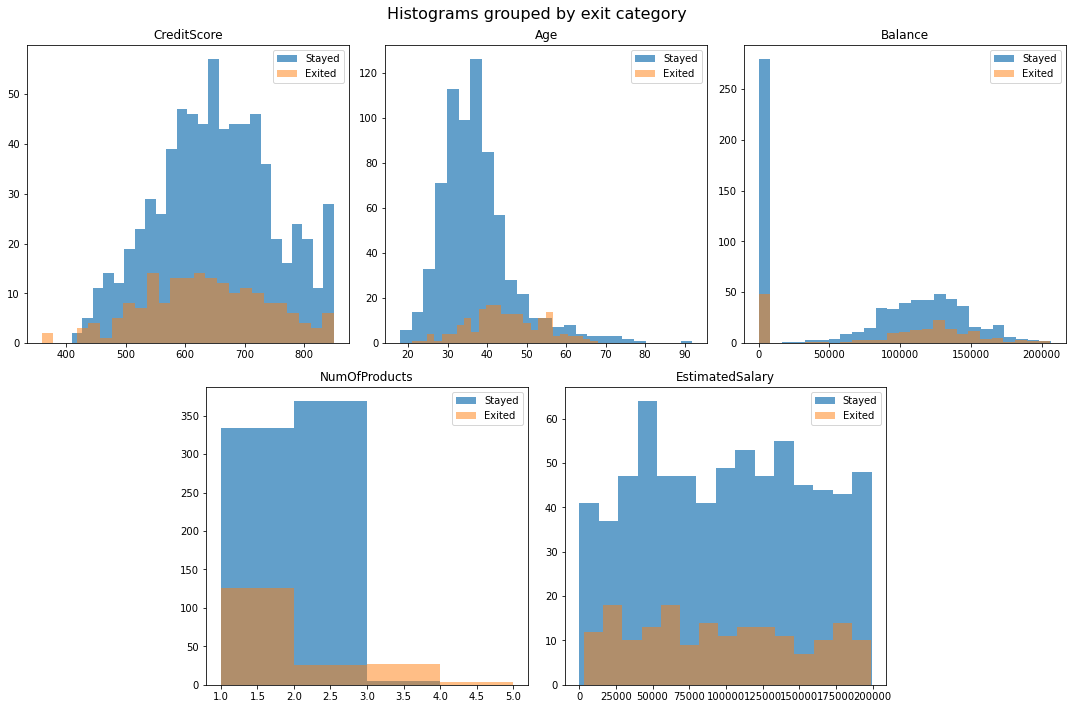

In [18]:
# Plot histograms for selected columns (by exit category)
# And with missing 'Tenure'
plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 6)
coord = [[0, 0, 2], [0, 2, 4], [0, 4, 6], [1, 1, 3], [1, 3, 5]]
for index, column in enumerate(['CreditScore', 'Age', 'Balance', 
                                'NumOfProducts', 'EstimatedSalary']):    
    plt.subplot(gs[coord[index][0], coord[index][1]:coord[index][2]])    
    plt.hist(df.query('Exited == 0 and Tenure.isna()')[column], 
             bins=[25, 25, 25, [1, 2, 3, 4, 5], 15][index], 
             label='Stayed', alpha=0.7)
    plt.hist(df.query('Exited == 1 and Tenure.isna()')[column], 
             bins=[25, 25, 25, [1, 2, 3, 4, 5], 15][index], 
             label='Exited', alpha=0.5)
    plt.legend()
    plt.title(column)    
plt.suptitle('Histograms grouped by exit category', fontsize=16)
plt.tight_layout()
plt.show()

Отличия конечно есть, но не существенные. Мы можем заполнить пропуски фиксированным значением, например, средним, однако распределение количества лет обслуживания довольно равномерное, поэтому сначала посмотрим, что из этого получится. Для заполнения пропусков применим `SimpleImputer` из `sklearn`:

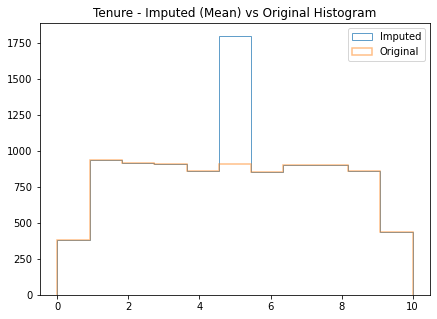

In [19]:
# Initialize imputer replacing missing values with 'mean'  
imputer_mean = SimpleImputer(strategy='mean')

# Plot imputed vs original histogram  
plt.figure(figsize=(7, 5))
plt.hist(pd.DataFrame(imputer_mean.fit_transform(df[columns_num]), 
                      columns=columns_num)['Tenure'], 
         bins=11, label='Imputed', histtype='step', alpha=0.7)
plt.hist(df['Tenure'], bins=11, label='Original', histtype='step', 
         linewidth=1.5, alpha=0.5)
plt.legend()
plt.title('Tenure - Imputed (Mean) vs Original Histogram') 
plt.show()

Выглядит не очень, да и характеристики распределения (дисперсию) мы скорее всего изменили. Поэтому попробуем другой способ - метод "ближайших соседей", который находит заданное количество наиболее похожих наблюдений (исходя из расстояния между признаками) и берет среднее значение уже по ним. Поскольку метод основан на "расстоянии", то сначала нам нужно масштабировать признаки. Для заполнения пропусков методом "ближайших соседей" применим `KNNImputer` из `sklearn`, а для масштабирования `StandardScaler` (стандартизация) из той же библиотеки:

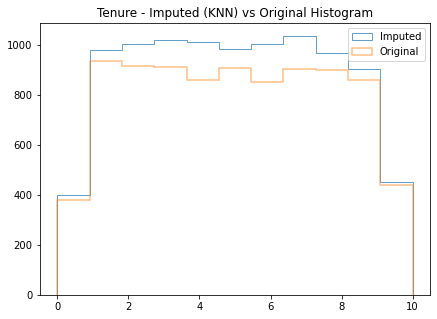

In [20]:
# Initialize KNN imputer 
imputer_knn = KNNImputer(n_neighbors=2)

# Initilize scaler
scaler = StandardScaler()

# Plot imputed vs original histogram
plt.figure(figsize=(7, 5))
plt.hist(
    pd.DataFrame(
        scaler.inverse_transform(
            imputer_knn.fit_transform(scaler.fit_transform(df[columns_num]))), 
        columns=columns_num)['Tenure'], 
    bins=11, label='Imputed', histtype='step', alpha=0.7)
plt.hist(df['Tenure'], bins=11, label='Original', histtype='step', 
         linewidth=1.5, alpha=0.5)
plt.legend()
plt.title('Tenure - Imputed (KNN) vs Original Histogram') 
plt.show()

Выглядит намного лучше. Однако, сразу заполнить пропуски мы не можем, так как данные у нас пока не разделены на обучающую и тестовую выборки, поэтому мы добавим их заполнение в "пайплайн" позже. Но в заключении добавим еще одну переменную, которая будет указывать было ли пропущено значение, вдруг пропуски все-таки не случайны:

In [21]:
# Add column indicating whether Tenure is missed
df['TenureNan'] = df['Tenure'].isna().astype(int)

### 2.4 Прочие преобразования

В этом разделе мы разделим нашу выборку на обучающую и тестовую и соберем "пайплайн" для предобработки, но сначала немного изменим разделение на количественные и категориальные признаки с учетом замечаний/изменений выше: 

In [22]:
# Re-split columns into categorical and numerical
columns_cat = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 
               'TenureNan', 'NumOfProducts']
columns_num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

Разделим признаки и целевой признак:

In [23]:
# Extract features and target variable
X = df[columns_cat + columns_num]
y = df['Exited']

Теперь разобьем нашу выборку на обучающую и тестовую, используя "стратифицированное" разделение. При этом, стратифицировать будем не только по целевому признаку, но и по количеству продуктов, используемых клиентом. Как отмечалось выше, похоже, что этот признак может быть важным, но основные отличия между классами проявляются в области с очень небольшим количеством наблюдений (см диаграммы распределения выше), поэтому желательно чтобы они присутствовали в равных пропорциях во всех выборках:      

In [24]:
# Split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=SEED_VALUE, 
                                                    stratify=y.astype(str) + 
                                                    X['NumOfProducts'].astype(str))

Для поиска и определения лучших гиперпараметров мы будем использовать `GridSearchCV` с кросс-валидацией. Однако, один из методов, который мы хотим использовать для борьбы с дисбалансом - изменение порога классификации, не может быть применен в рамках `GridSearchCV` и потребует отдельной валидационной выборки. Таким образом, у нас по сути будет два этапа валидации, что немного расточительно, но на наш взгляд допустимо, учитывая размер выборки.

С учетом вышесказанного, выделим валидационную выборку:

In [25]:
# Split train dataset into train and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size=.25, 
                                                      random_state=SEED_VALUE, 
                                                      stratify=y_train.astype(str) 
                                                      + X_train['NumOfProducts'].astype(str))

Проверим, что получилось: 

In [26]:
# Print subsets shapes
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_valid.shape}, {y_valid.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (5853, 11), (5853,)
Validation: (1951, 11), (1951,)
Test: (1952, 11), (1952,)


Похоже все разделилось правильно.

Теперь напишем функцию для еще одного метода борьбы с дисбалансом - увеличения "миноритарного" класса / уменьшения "мажоритарного" класса. При этом, отметим, что библиотека `imblearn`, которую мы будем использовать для создания "пайплайна" содержит соответствующие функции, однако, мы напишем свою - во-первых, в целях обучения, а во-вторых, она позволит нам легко сравнить эффективность увеличения и уменьшения классов в рамках `GridSearch`. Также отметим, что библиотека `sklearn` не позволяет использовать данный метод "исправления" дисбаланса в рамках "пайплайна", а заранее исправить дисбаланс при кросс-валидации мы не можем (при увеличении класса будет "утечка" данных из валидационной выборки, а при уменьшении - валидационная выборка будет сбалансирована, что исказит результат по сравнению с тестовой выборкой). 

Итак, напишем функцию:  

In [27]:
# Define up-/downsampling function
def x_sample(X, y, kind='up', classes=(0, 1)):
    # Breakdown classes
    X_major = X[y == classes[0]]    
    X_minor = X[y == classes[1]]
    y_major = y[y == classes[0]]
    y_minor = y[y == classes[1]]
    
    # Upsample minority class 
    # and concatenate with majority class
    if kind == 'up':
        n = round(len(y_major) / len(y_minor))        
        X_resampled = pd.concat([X_major] + [X_minor] * n)
        y_resampled = pd.concat([y_major] + [y_minor] * n)    
    # Downsample majority class 
    # and concatenate with minority class
    elif kind == 'down':
        n = len(y_minor)
        X_resampled = pd.concat(
            [resample(X_major, n_samples=n, replace=False, 
             random_state=SEED_VALUE)] + [X_minor])
        y_resampled = pd.concat(
            [resample(y_major, n_samples=n, replace=False, 
             random_state=SEED_VALUE)] + [y_minor])    
    # Raise error if 'kind' is misspecified
    else:
        raise ValueError('Kind should be set to up or down')    
    
    # Shuffle resampled data
    X_resampled, y_resampled = shuffle(X_resampled, y_resampled, 
                                       random_state=SEED_VALUE)
    
    return X_resampled, y_resampled

Для того чтобы мы могли использовать собственную функцию в рамках "пайплайна" используем класс `FunctionSampler` из `imblearn`:

In [28]:
# Create resampler for the main pipeline
resampler = FunctionSampler(func=x_sample, kw_args={'kind':'up'}, validate=False)

Теперь соберем отдельные "пайплайны" для предобработки количественных и категориальных признаков. Отметим, что по причинам указанным в предыдущем разделе при обработке количественных признаков, мы сначала используем стандартизацию, и только затем заполняем пропуски (обычно порядок обратный, так как заполнение пропусков может привести к изменению стандартного отклонения). Категориальные признаки переводим в "дамми" переменные, выкидывая первую получившуюся переменную, чтобы избежать "дамми" ловушки: 

In [29]:
# Create preprocessing pipeline for numerical values
pipeline_num = Pipeline([('scaler', StandardScaler()),
                         ('imputer', KNNImputer(n_neighbors=2))])                         

# Create preprocessing pipeline for categorical values
pipeline_cat = Pipeline([('encoder', OneHotEncoder(drop='first', sparse=False))])

И наконец соберем модуль для предобработки признаков, используя класс `ColumnTransformer` (из `sklearn`), который позволяет параллельно обрабатывать отдельные признаки (столбцы):

In [30]:
# Put preprocessing pipelines together
preprocessor = ColumnTransformer([('pipeline_num', pipeline_num, columns_num),
                                  ('pipeline_cat', pipeline_cat, columns_cat)])

## 3. Выбор модели

### 3.1 Выбор модели без учета дисбаланса классов

#### 3.1.1 Логистическая регрессия

Поиск лучшей модели начнем с логистической регрессии без учета дисбаланса классов. Но сначала, еще раз посмотрим на соотношение классов целевого признака (соотношение классов будет одинаковым во всех выборках, так как мы использовали "стратифицированное" разделение, см. выше). Это позволит нам оценить "адекватность" получаемых моделей с учетом дисбаланса:

In [31]:
# Show class distribution in validation set
y_train.value_counts(normalize=True)

0   0.79
1   0.21
Name: Exited, dtype: float64

Итак, предсказывая все время класс "0", мы будем правы в 79% случаев. 

Зададим количество частей на которые будет разбиваться обучающая выборка для кросс-валидации (5 частей), а также целевую метрику (F1):

In [32]:
# Set the number of cv folds
# And target metrics
cv = 5
scoring = 'f1'

Отметим, что `GridSearchCV` по умолчанию  использует "стратифицированное" разделение (по целевому признаку) для кросс-валидации.

В случае логистической регрессии мы попробуем перебрать два гиперпараметра, связанных с регуляризацией, которая помогает избежать переобучения модели, штрафуя большие весовые значения (в нашем случае коэффициенты регрессии) - тип регуляризации (`l1` и `l2`) и значение коэффициента регуляризации. Напомним, что в `sklearn` указывается обратное значение коэффициента, то есть, чем больше значение гиперпараметра `'C'`, тем меньше "штраф" и больше возможность переобучения:

In [33]:
%%time
# Set pipeline for logistic regression
pipeline = Pipeline([('preprocessing', preprocessor),
                     ('model', LogisticRegression(
                         random_state=SEED_VALUE, solver='liblinear', max_iter=1000))])

# Set hyperparameter values to serach through 
param_grid = [{'model__penalty': ['l1', 'l2'],
               'model__C': [0.01, 0.1, 1, 10, 100]}]

# Perform grid search for best hyperparameters based on f1 score
grid_lr = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, 
                       cv=cv, n_jobs=-1, return_train_score=True)
grid_lr.fit(X_train, y_train)

# Print best parameters, train and validation accuracy
print(f"Best hyperparameters: {grid_lr.best_params_}")
print(f"Best F1 metrics: {grid_lr.best_score_:.2f}")

Best hyperparameters: {'model__C': 1, 'model__penalty': 'l1'}
Best F1 metrics: 0.50
CPU times: total: 1.75 s
Wall time: 15.3 s


Итак, целевого значения метрики мы не достигли. Отметим, так же, что полученная метрика посчитана после переобучения модели на всей обучающей выборке. 

Для того чтобы посмотреть средние значения метрики полученные во время обучения и валидации при изменении гиперпараметра (в случае нескольких гиперпараметров, один изменяется, а остальные находятся на оптимальных значениях), напишем следующую функцию:   

In [34]:
# Define a function that plots gridsearch train and validation scores 
def plot_gridsearch_results(grid):
    # Get train / validation scores and hyperparameters 
    train_score = grid.cv_results_['mean_train_score']
    valid_score = grid.cv_results_['mean_test_score']
    params = grid.param_grid[0]
    
    # Generate masks to get indexes of values per hyperparameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for key, value in grid.best_params_.items():
        masks.append(list(grid.cv_results_['param_'+ key].data == value))
    if len(masks) == 1:
        masks.append([True] * len(masks[0]))        
    
    # Plot results
    plt.figure(figsize=(4 * len(params), 4))
    for index, name in enumerate(masks_names):    
        best_params_mask = np.stack(masks[0:index] + masks[index + 1: ]).all(axis=0)
        best_params_index = np.where(best_params_mask)    
        plt.subplot(1, len(masks_names), index + 1)    
        plt.plot(train_score[best_params_index], '-o', label='train')
        plt.plot(valid_score[best_params_index], '-o', label='valid')
        plt.xticks(list(range(len(params[name]))), labels=params[name])
        plt.xlabel(name)
        plt.ylabel('mean score')
        plt.legend()
        plt.grid('on')
    plt.suptitle('Grid Search Scores', fontsize=16)
    plt.tight_layout()
    plt.show()

Теперь выведем график изменения метрики в зависимости от значений гиперпараметров:

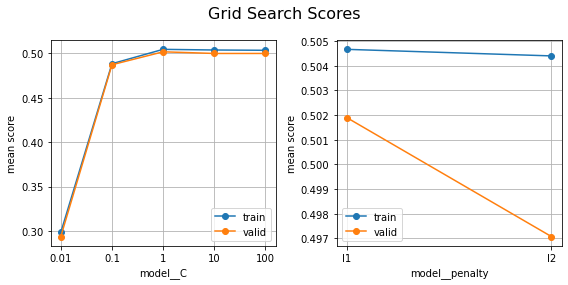

In [35]:
# Plot grid search train and validation scores
plot_gridsearch_results(grid_lr)

Как и ожидалось при увеличении параметра `'C'` средняя целевая метрика увеличивалась на обучающих выборках. При этом, модель мы явно не переобучили (разница между средними метриками на обучающих и валидационных выборках очень небольшая). Отметим также, что хотя модель и показала лучший результат c регуляризацией `l1`, отличие от результата с регуляризацией `l2` минимально. 

Выведем полученные коэффициенты регрессии:

In [36]:
# Get feature names
feature_names = (columns_num + list(
    grid_lr.best_estimator_
    .named_steps
    .preprocessing
    .named_transformers_
    .pipeline_cat
    .named_steps
    .encoder
    .get_feature_names_out(columns_cat)))

# Show regression coefficients
pd.Series(*grid_lr.best_estimator_.named_steps.model.coef_, 
          index=feature_names).sort_values(ascending=False) 

NumOfProducts_4      4.52
NumOfProducts_3      2.44
Geography_Germany    0.99
Age                  0.76
TenureNan_1          0.08
EstimatedSalary      0.03
HasCrCard_1          0.00
Geography_Spain     -0.02
Tenure              -0.04
CreditScore         -0.06
Balance             -0.07
Gender_Male         -0.56
IsActiveMember_1    -1.20
NumOfProducts_2     -1.58
dtype: float64

Похоже, как и ожидалось, количество используемых продуктов значительно влияет на шансы (логарифм отношения шансов) отнесения к классу "1" - 3 и более продуктов увеличвают шансы ухода (напомним, что мы масштабировали признаки, поэтому можем сравнивать коэффициенты между собой). Также значительное влияние оказывает место проживания (проживание в Германии увеличивает шансы ухода), возраст (чем старше, тем больше шансы ухода), активность (если клиент активный, то шансы ухода меньше) и пол (мужской пол снижает шансы ухода). 

Теперь посмотрим на нашу метрику (а также другие метрики качества) на валидационной выборке. Для этого воспользуемся `classification_report` из `sklearn`:

In [37]:
# Make predictions for validation dataset
y_pred = grid_lr.predict(X_valid)

# Generate classification report for validation dataset
print(classification_report(y_valid, y_pred, target_names=['Stayed', 'Exited']))

              precision    recall  f1-score   support

      Stayed       0.86      0.96      0.91      1551
      Exited       0.71      0.42      0.53       400

    accuracy                           0.85      1951
   macro avg       0.79      0.69      0.72      1951
weighted avg       0.83      0.85      0.83      1951



Метрика - F1 даже немного "подросла", но все равно намного ниже целевого значения. Основной причиной является низкая полнота (*recall*) - 0.42, то есть из всех ушедших из банка мы определили как таковых только в 42% случаев. Отметим, что при этом доля правильных ответов в целом (85%) превосходит наш критерий "адекватности".

Более наглядно полученный результат можно продемонстрировать при помощи матрицы ошибок (*Confusion matrix*):

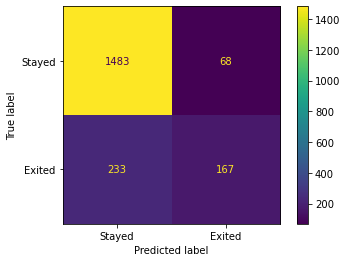

In [38]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Действительно в 233 случаев ушедших из банка определили, как оставшихся, и только в 167 случаях правильно. Навряд ли такая модель устроит банк.

В заключение проконтролируем площадь под ROC-кривой:

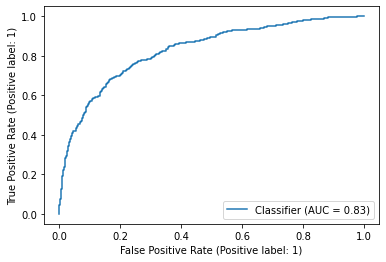

In [39]:
# Predict probabilities
prob_valid = grid_lr.predict_proba(X_valid)

# Plot ROC curve
RocCurveDisplay.from_predictions(y_valid, prob_valid[:, 1])
plt.show()

Площадь значительно больше чем 0.5 (площадь случайной модели), то есть наша модель делает прогнозы не случайным образом. 

#### 3.1.2 Случайный лес

Теперь рассмотрим другую модель - случайный лес. В отличие от регрессии это нелинейная модель, что может улучшить результат (если наши классы не разделены гиперплоскостью - прямой).  

В случае случайного леса мы будем перебирать два гиперпараметра - максимальную "глубину" (*max_depth*), то есть максимальное количество делений обучающего множества на подмножества, и количество деревьев (*n_estimators*). Чем больше деревьев, тем дольше модель будет учиться, но результат станет лучше (и наоборот):

In [40]:
%%time
# Set pipeline for random forest
pipeline = Pipeline([('preprocessing', preprocessor),
                     ('model', 
                      RandomForestClassifier(random_state=SEED_VALUE))])

# Set hyperparameter values to serach through 
param_grid = [{'model__max_depth': np.array(range(1, 6)),
               'model__n_estimators': np.array(range(10, 101, 10))}]

# Perform grid search for best hyperparameters based on f1 score
grid_rf = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, 
                       cv=cv, n_jobs=-1, return_train_score=True)
grid_rf.fit(X_train, y_train)

# Print best parameters, train and validation accuracy
print(f"Best hyperparameters: {grid_rf.best_params_}")
print(f"Best F1 metrics: {grid_rf.best_score_:.2f}")

Best hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 90}
Best F1 metrics: 0.46
CPU times: total: 5.12 s
Wall time: 54.7 s


Метрика F1 даже хуже, чем в случае регрессии, либо все-таки линейная модель подходит больше, либо дисбаланс сильнее влияет на качество случайного леса.

Посмотрим значения метрики при изменении гиперпараметров: 

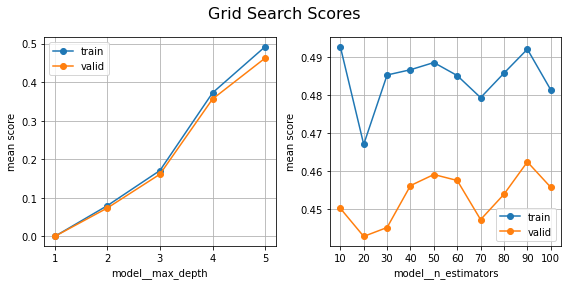

In [41]:
# Plot grid search train and validation scores
plot_gridsearch_results(grid_rf)

Ожидаемо, при росте "глубины" растет и метрика. При этом, разрыв между средними метриками на обучающих и валидационных выборках начинает увеличиваться, то есть дальнейшее увеличение "глубины" может привести к переобучению. Рост количества деревьев также приводит к росту метрики (хоть и не так стабильно), но при этом соотношение между средними метриками на обучающих и валидационных выборках относительно постоянно.

Посмотрим на важность признаков:

In [42]:
# Show feature importances
pd.Series(grid_rf.best_estimator_.named_steps.model.feature_importances_, 
          index=feature_names).sort_values(ascending=False) 

Age                 0.32
NumOfProducts_2     0.21
NumOfProducts_3     0.14
IsActiveMember_1    0.10
Geography_Germany   0.06
Balance             0.05
NumOfProducts_4     0.04
CreditScore         0.03
Gender_Male         0.02
EstimatedSalary     0.01
Tenure              0.01
Geography_Spain     0.00
HasCrCard_1         0.00
TenureNan_1         0.00
dtype: float64

В данном случае важность определяется как суммарное снижение неопределенности (критерия Джини), достигаемое при включении того или иного признака. В отличие от коэффициентов регрессии "важность" всегда положительна и не указывает на взаимосвязь с каким-то конкретным классом. Сумма важности всех признаков равна 1.

Однако, как и в случае с регрессией, возраст, количество продуктов, активность и местоположение оказывают значительное влияние на определение класса.  

Теперь посмотрим метрики на валидационной выборке:

In [43]:
# Make predictions for validation dataset
y_pred = grid_rf.predict(X_valid)

# Generate classification report for validation dataset
print(classification_report(y_valid, y_pred, target_names=['Stayed', 'Exited']))

              precision    recall  f1-score   support

      Stayed       0.85      0.99      0.91      1551
      Exited       0.85      0.33      0.47       400

    accuracy                           0.85      1951
   macro avg       0.85      0.66      0.69      1951
weighted avg       0.85      0.85      0.82      1951



И опять метрика F1 немного лучше (по сравнению с обучающей выборкой), похоже нам повезло с валидационной выборкой. Однако, по сравнению с регрессией полнота стала еще хуже - 0.33 (правда точность немного выросла), что и сказалось на снижении метрики F1. При этом доля правильных находится примерно на том же уровне. 

Посмотрим матрицу ошибок:

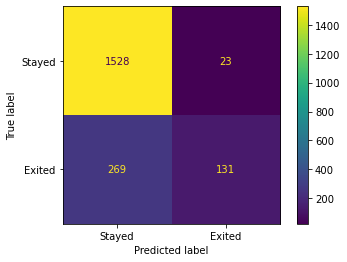

In [44]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Только в 131 случае мы определили действительно "ушедших" как таковых, а в 269 случаях отнесли их к "оставшимся".

Проконтролируем площадь под кривой ROC: 

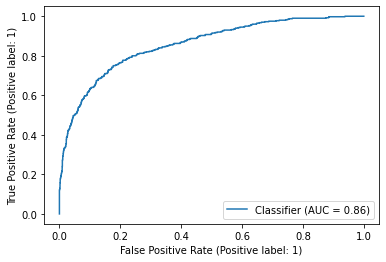

In [45]:
# Predict probabilities
prob_valid = grid_rf.predict_proba(X_valid)

# Plot ROC curve
RocCurveDisplay.from_predictions(y_valid, prob_valid[:, 1])
plt.show()

По сравнению с регрессией площадь немного выросла, то есть при правильном подборе порога отнесения к тому или иному классу, случайный лес может показать лучший результат (по сравнению с регрессией). 

#### 3.1.3 Выводы

Мы рассмотрели две модели - логистическую регрессию и случайный лес. При этом мы не учитывали дисбаланс классов и результат оказался неудовлетворительным. Целевая метрика в обоих случаях (регрессия - 0.53 и случайный лес - 0.47) не достигла целевого показателя (0.59). Основной причиной является низкое качество определения фактически ушедших из банка клиентов, как таковых (полнота), что вероятно связано с дисбалансом классов (фактически ушедшие клиенты являются "миноритарным" классом). При этом обе модели превысили критерии случайности и адекватности. Также отметим, что несмотря на то, что случайный лес показал худший результат, чем регрессия, большее значение площади под кривой ROC (в случае первого), может говорить о том, что поправка моделей на дисбаланс может привести к тому, что именно случайный лес окажется "лучшей" моделью.    

### 3.2 Выбор модели c учетом дисбаланса классов

#### 3.2.1 Логистическая регрессия

Попробуем "скорректировать" наши модели с учетом дисбаланса классов, и начнем с логистической регрессии. 

В качестве одного из методов борьбы с дисбалансом рассмотрим изменение порога вероятности, в соответствии с которым мы относим наблюдение к положительному классу ("1"). По умолчанию этот порог составляет 0.5, то есть если вероятность положительного класса, определяемого моделью, больше 0.5, то наблюдение будет отнесено к нему. Попробуем изменить этот порог и посмотрим, как будет меняться наша метрика F1. Для этого сначала напишем функцию, которая считает разные значения метрики при разных значениях порога:    

In [46]:
# Define 'F1 curve' function
def f1_curve(y_true, prob_pred, step=0.1):    
    threshold = np.arange(0, 1, step)    
    f1_curve = np.zeros(len(threshold))
    
    for index, thres in enumerate(threshold):
        y_pred = np.where(prob_pred > thres, 1, 0)
        f1_curve[index] = f1_score(y_true, y_pred)
        
    return f1_curve, threshold

Теперь спрогнозируем вероятности (используя модель, полученную в предыдущем разделе) для обучающей и валидационной выборок, и используя функцию выше, построим зависимость метрики F1 от порога (назовем ее F1-кривой): 

Train. Max F1: 0.58, Threshold: 0.29
Validation. Max F1: 0.59, Threshold: 0.27


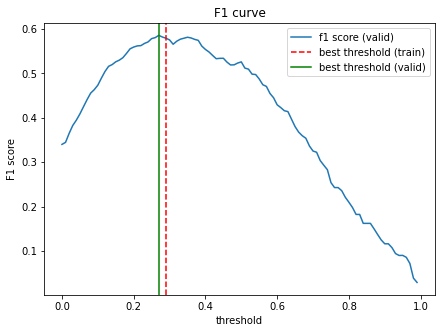

In [47]:
# Predict probabilities for train and validation sets
prob_train = grid_lr.predict_proba(X_train)
prob_valid = grid_lr.predict_proba(X_valid)

# Calculate F1 values for different thresholds
f1_train, threshold_train = f1_curve(y_train, prob_train[:, 1], 
                                     step=0.01)
f1_valid, threshold_valid = f1_curve(y_valid, prob_valid[:, 1], 
                                     step=0.01)

# Compute thresholds for max f1 metric
threshold_lr_train = threshold_train[np.argmax(f1_train)]
threshold_lr_valid = threshold_valid[np.argmax(f1_valid)]

# Print max F1 score and corresponding threshold
print(f"Train. Max F1: {max(f1_train):.2f}, Threshold: {threshold_lr_train}")
print(f"Validation. Max F1: {max(f1_valid):.2f}, Threshold: {threshold_lr_valid}")

# Plot F1 curve
plt.figure(figsize=(7, 5))
plt.plot(threshold_valid, f1_valid, label='f1 score (valid)')
plt.axvline(x=threshold_lr_train, linestyle='--', 
            color='red', label='best threshold (train)')
plt.axvline(x=threshold_lr_valid, linestyle='-', 
            color='green', label='best threshold (valid)')
plt.xlabel('threshold')
plt.ylabel('F1 score')
plt.legend() 
plt.title('F1 curve')
plt.show()

На графике выше отображена F1-кривая для валидационной выборки, а также показаны значения порогов, при которых метрика достигает максимума, для валидационной и обучающей выборок. Как видно из графика, значения порогов немного отличаются, поэтому значение метрики, которое мы получим, используя порог, определенный по обучающей выборке, может быть немного ниже, чем максимальная метрика для валидационной выборки. Также отметим, что в любом случае мы не достигли минимального требуемого значения метрики, хотя результат значительно улучшился. 

Посмотрим, какие метрики мы получим на валидационной выборке (используя порог, полученный на обучающей):  

In [48]:
# Make predictions for validation dataset
y_pred = (prob_valid[:, 1] >= threshold_lr_train).astype(bool)

# Generate classification report for validation dataset
class_report_lr_thres = classification_report(y_valid, y_pred, 
                                              target_names=['Stayed', 'Exited'])
print(class_report_lr_thres)

              precision    recall  f1-score   support

      Stayed       0.90      0.86      0.88      1551
      Exited       0.53      0.64      0.58       400

    accuracy                           0.81      1951
   macro avg       0.72      0.75      0.73      1951
weighted avg       0.83      0.81      0.82      1951



F1-метрика не изменилась (или практически не изменилась, так как значение округлено) по сравнению с обучающей выборкой, но значительно выросла по сравнению с "базовой" моделью. При этом, по сравнению с этой же моделью, полнота выросла до 0.64, но упала точность (*precision*). Также немного снизилась доля правильных ответов (до 81%).

Посмотрим на матрицу ошибок:

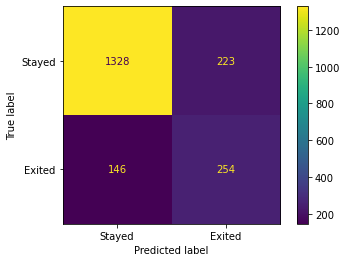

In [49]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Итак, теперь только в 146 случаях "ушедшие" отнесены к "оставшимся", а в 254 случаях определены правильно. Однако, количество "оставшихся" неправильно отнесенных к "ушедшим" выросло в 3 раза, что и сказалось на точности. 

Попробуем другой метод борьбы с дисбалансом - взвешивание классов, который предполагает, что при расчете функции потерь (*loss function*) ошибкам "миноритарного" класса будет присвоен больший вес, и соответственно вырастет их важность при оптимизации ошибки модели. В отличие от изменения порога, модель со взвешиванием, это уже по сути новая модель, поэтому мы заново переберем гиперпараметры для поиска "лучшей" модели:     

In [50]:
%%time
# Set pipeline for logistic regression
pipeline = Pipeline([('preprocessing', preprocessor),
                     ('model', LogisticRegression(
                         random_state=SEED_VALUE, solver='liblinear', 
                         max_iter=1000, class_weight='balanced'))])

# Set hyperparameter values to serach through 
param_grid = [{'model__penalty': ['l1', 'l2'],
               'model__C': [0.01, 0.1, 1, 10, 100]}]

# Perform grid search for best hyperparameters based on f1 score
grid_lr_weight = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, 
                              cv=cv, n_jobs=-1, return_train_score=True)
grid_lr_weight.fit(X_train, y_train)

# Print best parameters, train and validation accuracy
print(f"Best hyperparameters: {grid_lr_weight.best_params_}")
print(f"Best F1 metrics: {grid_lr_weight.best_score_:.2f}")

Best hyperparameters: {'model__C': 1, 'model__penalty': 'l2'}
Best F1 metrics: 0.57
CPU times: total: 2.14 s
Wall time: 8.73 s


Итак, мы опять не достигли минимальной метрики, хотя она и улучшилась по сравнению с "базовой" регрессией (но немного снизилась по сравнению с изменением порога). Обратим внимание, что оптимальный тип регуляризации изменился на `l2`(по сравнению с "базовой" версией). Посмотрим на изменение метрики в ходе обучения и валидации:

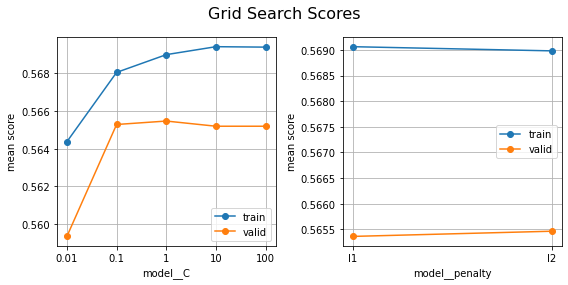

In [51]:
# Plot grid search train and validation scores
plot_gridsearch_results(grid_lr_weight)

Как и в случае "базовой" модели при увеличении параметра `'C'` метрика на обучающих выборках росла, однако при значениях параметра более 1, валидационная метрика стала падать. Однако, отметим, что разница между метриками на обучающей и валидационной выборках в этом случае значительно меньше, чем для "базовой" модели (не очевидно из-за разного масштаба графиков). Также уменьшилась и разница между метриками для разных типов регуляризации. Посмотрим коэффициенты регрессии:    

In [52]:
# Show regression coefficients
pd.Series(*grid_lr_weight.best_estimator_.named_steps.model.coef_, 
          index=feature_names).sort_values(ascending=False) 

NumOfProducts_4      2.94
NumOfProducts_3      2.33
Geography_Germany    0.97
Age                  0.80
TenureNan_1          0.08
EstimatedSalary      0.02
Geography_Spain     -0.01
HasCrCard_1         -0.02
Balance             -0.02
Tenure              -0.05
CreditScore         -0.06
Gender_Male         -0.63
IsActiveMember_1    -1.08
NumOfProducts_2     -1.54
dtype: float64

Положительные коэффициенты стали более равномерными, однако порядок "важности" признаков практически не изменился (за исключением возраста и местонахождения). Посмотрим метрики на валидационной выборке: 

In [53]:
# Make predictions for validation dataset
y_pred = grid_lr_weight.predict(X_valid)

# Generate classification report for validation dataset
class_report_lr_weight = classification_report(y_valid, y_pred, 
                                               target_names=['Stayed', 'Exited'])
print(class_report_lr_weight)

              precision    recall  f1-score   support

      Stayed       0.92      0.76      0.84      1551
      Exited       0.45      0.76      0.57       400

    accuracy                           0.76      1951
   macro avg       0.69      0.76      0.70      1951
weighted avg       0.83      0.76      0.78      1951



F1-метрика немного ниже, чем при оптимизации порога (такая же как и на обучающей выборке), а вот соотношение точности и полноты поменялось значительно. Модель относительно неплохо определяет "ушедших" среди действительно ушедших из банка клиентов, но при этом также относит к "ушедшим" значительное количество (более 50%) клиентов другого класса. Также отметим, что доля правильных ответов снизилась по сравнению со всеми предыдущими моделями, и стала ниже нашего порога "адекватности" (при этом причина конечно обратная). 

Посмотрим матрицу ошибок: 

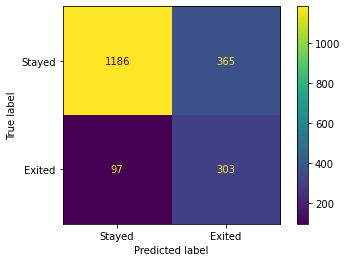

In [54]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Итак, мы правильно классифицировали 303 ушедших клиента, как "ушедших", но еще добавили к ним 365 клиентов, которые никуда не уходили.

Проверим площадь под ROC-кривой:

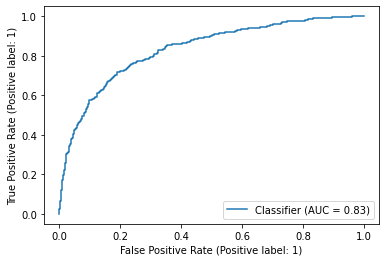

In [55]:
# Predict probabilities
prob_valid = grid_lr_weight.predict_proba(X_valid)

# Compute area under ROC (for summary table below)
auc_roc_lr_weight = roc_auc_score(y_valid, prob_valid[:, 1])

# Plot ROC curve
RocCurveDisplay.from_predictions(y_valid, prob_valid[:, 1])
plt.show()

Такая же как и у "базовой" модели, что неудивительно, так как по сути мы не добавили новой информации, а фактически изменили положение на "базовой" кривой.

Последний метод, или скорее методы борьбы с дисбалансом, которые мы попробуем - увеличение / уменьшение выборки (функцию для этих методов мы написали в разделе 2). Помимо типа и коэффициента регуляризации переберем также "увеличение" и "уменьшение", возможно какой-то метод покажет лучший результат: 

In [56]:
%%time
# Set pipeline for logistic regression
pipeline = Pipeline([('resampling', resampler),
                     ('preprocessing', preprocessor),
                     ('model', LogisticRegression(
                         random_state=SEED_VALUE, solver='liblinear'))])

# Set hyperparameter values to serach through 
param_grid = [{'resampling__kw_args': [{'kind': 'up'}, {'kind': 'down'}],
               'model__penalty': ['l1', 'l2'], 
               'model__C': [0.01, 0.1, 1, 10, 100]}]

# Perform grid search for best hyperparameters based on f1 score
grid_lr_resamp = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, 
                              cv=cv, n_jobs=-1, return_train_score=True)
grid_lr_resamp.fit(X_train, y_train)

# Print best parameters, train and validation accuracy
print(f"Best hyperparameters: {grid_lr_resamp.best_params_}")
print(f"Best F1 metrics: {grid_lr_resamp.best_score_:.2f}")

Best hyperparameters: {'model__C': 10, 'model__penalty': 'l1', 'resampling__kw_args': {'kind': 'up'}}
Best F1 metrics: 0.57
CPU times: total: 3.89 s
Wall time: 17.5 s


Целевая метрика такая же, как и при взвешивании, и похоже что "увеличение" выборки дает лучший результат. Посмотрим на графиках: 

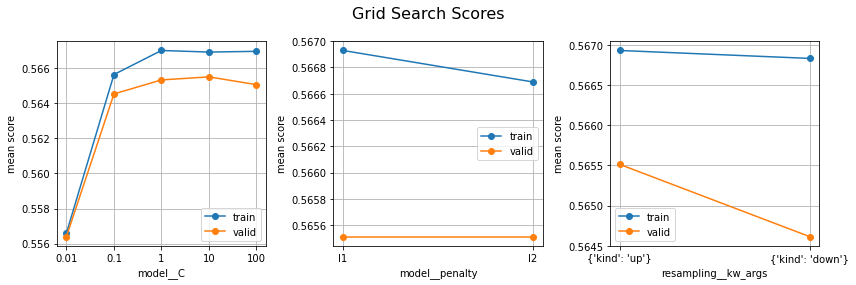

In [57]:
# Plot grid search train and validation scores
plot_gridsearch_results(grid_lr_resamp)

Разница между "увеличением" и "уменьшением" выборки выражается в сотых долях - видна только машине. Посмотрим коэффициенты регрессии: 

In [58]:
# Show regression coefficients
pd.Series(*grid_lr_resamp.best_estimator_.named_steps.model.coef_, 
          index=feature_names).sort_values(ascending=False) 

NumOfProducts_4      6.85
NumOfProducts_3      2.48
Geography_Germany    0.97
Age                  0.81
TenureNan_1          0.08
EstimatedSalary      0.02
Geography_Spain     -0.01
HasCrCard_1         -0.02
Balance             -0.02
Tenure              -0.05
CreditScore         -0.06
Gender_Male         -0.63
IsActiveMember_1    -1.09
NumOfProducts_2     -1.55
dtype: float64

Изменения по сравнению со взвешиванием есть, но незначительные. Посмотрим метрики на валидационной выборке:

In [59]:
# Make predictions for validation dataset
y_pred = grid_lr_resamp.predict(X_valid)

# Generate classification report for validation dataset
class_report_lr_resamp = classification_report(y_valid, y_pred, 
                                               target_names=['Stayed', 'Exited'])
print(class_report_lr_resamp)

              precision    recall  f1-score   support

      Stayed       0.93      0.76      0.83      1551
      Exited       0.45      0.76      0.56       400

    accuracy                           0.76      1951
   macro avg       0.69      0.76      0.70      1951
weighted avg       0.83      0.76      0.78      1951



И здесь все очень похоже на модель со взвешиванием с минимальными отличиями. Выведем матрицу ошибок:

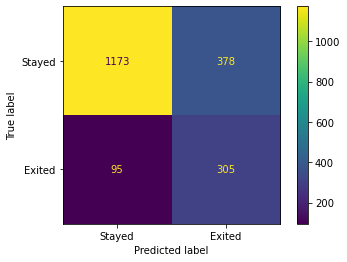

In [60]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Немного лучше полнота, немного хуже точность, но в целом все также, как и при взвешивании. Проконтролируем площадь под кривой ROC:

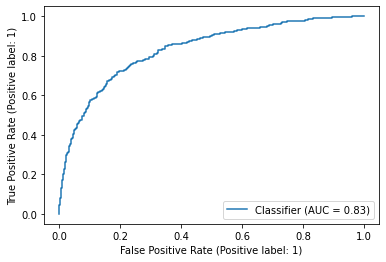

In [61]:
# Predict probabilities
prob_valid = grid_lr_resamp.predict_proba(X_valid)

# Compute area under ROC (for summary table below)
auc_roc_lr_resamp = roc_auc_score(y_valid, prob_valid[:, 1])

# Plot ROC curve
RocCurveDisplay.from_predictions(y_valid, prob_valid[:, 1])
plt.show()

И здесь все также и видимо по тем же причинам, что и в случае со взвешиванием (см. выше). 

Таким образом, несмотря на то, что различные методы борьбы с дисбалансом помогли нам улучшить результат по сравнению с "базовой" моделью, минимального целевого значения метрики F1 мы пока не достигли. Посмотрим, что получится, если применить те же методы к случайному лесу (большая площадь под кривой ROC случайного леса по сравнению с регрессией дает нам надежду).  

#### 3.2.2 Случайный лес

Как и в случае с регрессией начнем с изменения порога:

Train. Max F1: 0.64, Threshold: 0.28
Validation. Max F1: 0.63, Threshold: 0.26


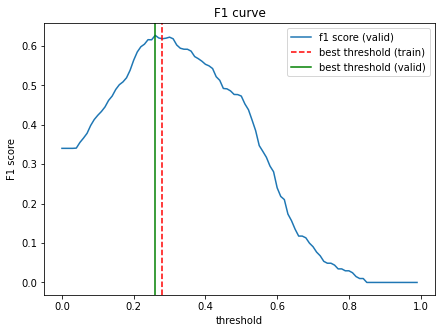

In [62]:
# Predict probabilities for train and validation sets
prob_train = grid_rf.predict_proba(X_train)
prob_valid = grid_rf.predict_proba(X_valid)

# Calculate F1 values for different thresholds
f1_train, threshold_train = f1_curve(y_train, prob_train[:, 1], 
                                     step=0.01)
f1_valid, threshold_valid = f1_curve(y_valid, prob_valid[:, 1], 
                                     step=0.01)

# Compute thresholds for max f1 metric
threshold_rf_train = threshold_train[np.argmax(f1_train)]
threshold_rf_valid = threshold_valid[np.argmax(f1_valid)]

# Print max F1 score and corresponding threshold
print(f"Train. Max F1: {max(f1_train):.2f}, Threshold: {threshold_rf_train}")
print(f"Validation. Max F1: {max(f1_valid):.2f}, Threshold: {threshold_rf_valid}")

# Plot F1 curve
plt.figure(figsize=(7, 5))
plt.plot(threshold_valid, f1_valid, label='f1 score (valid)')
plt.axvline(x=threshold_rf_train, linestyle='--', 
            color='red', label='best threshold (train)')
plt.axvline(x=threshold_rf_valid, linestyle='-', 
            color='green', label='best threshold (valid)')
plt.xlabel('threshold')
plt.ylabel('F1 score')
plt.legend() 
plt.title('F1 curve')
plt.show()

Похоже мы наконец-то превысили минимальное требуемое значение метрики F1. Проверим на валидационной выборке:

In [63]:
# Make predictions for validation dataset
y_pred = (prob_valid[:, 1] >= threshold_rf_train).astype(bool)

# Generate classification report for validation dataset
class_report_rf_thres = classification_report(y_valid, y_pred, 
                                              target_names=['Stayed', 'Exited']) 
print(class_report_rf_thres)

              precision    recall  f1-score   support

      Stayed       0.91      0.89      0.90      1551
      Exited       0.60      0.64      0.62       400

    accuracy                           0.84      1951
   macro avg       0.75      0.76      0.76      1951
weighted avg       0.84      0.84      0.84      1951



Да, значение метрики конечно ниже, чем на обучающей выборке, но все-равно выше минимального порога. Полнота и точность примерно одинаковые, а доля правильных ответов 84%. Посмотрим матрицу ошибок:

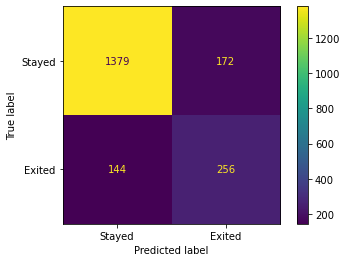

In [64]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Не идеально, но значительно лучше, чем было. Посмотрим, получится ли улучшить результат используя взвешивание:

In [65]:
%%time
# Set pipeline for random forest
pipeline = Pipeline([('preprocessing', preprocessor),
                     ('model', 
                      RandomForestClassifier(random_state=SEED_VALUE, 
                                             class_weight='balanced'))])

# Set hyperparameter values to serach through 
param_grid = [{'model__max_depth': np.array(range(1, 6)),
               'model__n_estimators': np.array(range(10, 101, 10))}]

# Perform grid search for best hyperparameters based on f1 score
grid_rf_weight = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, 
                              cv=cv, n_jobs=-1, return_train_score=True)
grid_rf_weight.fit(X_train, y_train)

# Print best parameters, train and validation accuracy
print(f"Best hyperparameters: {grid_rf_weight.best_params_}")
print(f"Best F1 metrics: {grid_rf_weight.best_score_:.2f}")

Best hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 60}
Best F1 metrics: 0.60
CPU times: total: 4.84 s
Wall time: 53 s


Метрика F1 немного ниже, чем при изменении порога, но все равно выше, чем минимальное требуемое значение. Посмотрим графики изменения гиперпараметров:

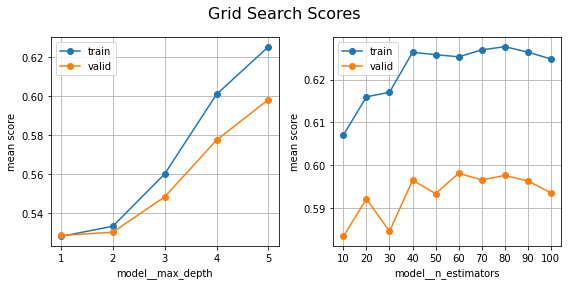

In [66]:
# Plot grid search train and validation scores
plot_gridsearch_results(grid_rf_weight)

Относительно небольшие изменения по сравнению с базовой моделью, хотя оптимальное количество деревьев и снизилось до 60. Посмотрим относительную важность признаков:

In [67]:
# Show feature importances
pd.Series(grid_rf_weight.best_estimator_.named_steps.model.feature_importances_, 
          index=feature_names).sort_values(ascending=False) 

Age                 0.31
NumOfProducts_2     0.27
IsActiveMember_1    0.10
NumOfProducts_3     0.08
Balance             0.07
Geography_Germany   0.07
Gender_Male         0.03
CreditScore         0.02
NumOfProducts_4     0.02
EstimatedSalary     0.01
Tenure              0.01
Geography_Spain     0.01
HasCrCard_1         0.00
TenureNan_1         0.00
dtype: float64

По сравнению с базовой моделью порядок немного поменялся, но возраст, количество продуктов и активность по прежнему лидируют. Проверим метрики на валидационоой выборке: 

In [68]:
# Make predictions for validation dataset
y_pred = grid_rf_weight.predict(X_valid)

# Generate classification report for validation dataset
class_report_rf_weight = classification_report(y_valid, y_pred, 
                                               target_names=['Stayed', 'Exited'])
print(class_report_rf_weight)

              precision    recall  f1-score   support

      Stayed       0.93      0.83      0.87      1551
      Exited       0.53      0.74      0.62       400

    accuracy                           0.81      1951
   macro avg       0.73      0.79      0.75      1951
weighted avg       0.84      0.81      0.82      1951



Интересно, целевая метрика немного выросла по сравнению с обучающей выборкой (все-таки валидационная выборка у нас очень "счастливая" получилась, возможно это просто случайность) и достигла значения, которое мы получили при изменении порога. Зато соотношение между полнотой и точностью изменилось довольно существенно (в пользу первой) по сравнению с изменением порога, а доля правильных ответов снизилась. Посмотрим матрицу ошибок:  

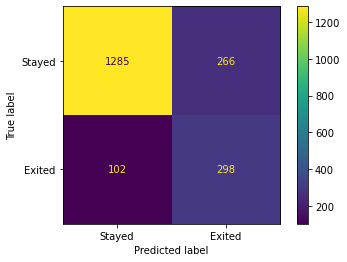

In [69]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Итак, у нас опять довольно много случаев (266), когда оставшиеся клиенты классифицированы, как "ушедшие", но зато (по сравнению с изменением порога) всего 104 случая, когда ушедшие клиенты отнесены к оставшимся. 

А что лучше с точки зрения банка - минимизировать долю клиентов, которые собираются уйти, но при этом израсходовать относительно больше средств на "удержание" (так как "удерживать" будут относительно больше клиентов, которые и не собирались уходить), или максимально оптимизировать расходы на удержание, но при этом потерять относительно большую долю клиентов? В конечном итоге, ответ вероятно зависит от соотношения между издержками на привлечение новых клиентов, и издержками на удержание текущих.     

Вернемся к модели и проконтролируем площадь под ROC-кривой:

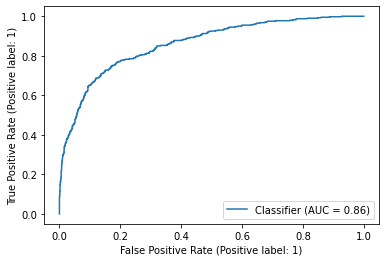

In [70]:
# Predict probabilities
prob_valid = grid_rf_weight.predict_proba(X_valid)

# Compute area under ROC (for summary table below)
auc_roc_rf_weight = roc_auc_score(y_valid, prob_valid[:, 1])

# Plot ROC curve
RocCurveDisplay.from_predictions(y_valid, prob_valid[:, 1])
plt.show()

Площадь такая же, как и для "базовой" модели (о возможных причинах см. выше).

И в заключение попробуем применить "увеличение" / "уменьшение" выборки:

In [71]:
%%time
# Set pipeline for random forest
pipeline = Pipeline([('resampling', resampler),
                     ('preprocessing', preprocessor),
                     ('model', 
                      RandomForestClassifier(random_state=SEED_VALUE))])

# Set hyperparameter values to serach through 
param_grid = [{'resampling__kw_args': [{'kind': 'up'}, {'kind': 'down'}],
               'model__max_depth': np.array(range(1, 6)),
               'model__n_estimators': np.array(range(10, 101, 10))}]

# Perform grid search for best hyperparameters based on f1 score
grid_rf_resamp = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, 
                              cv=cv, n_jobs=-1, return_train_score=True)
grid_rf_resamp.fit(X_train, y_train)

# Print best parameters, train and validation accuracy
print(f"Best hyperparameters: {grid_rf_resamp.best_params_}")
print(f"Best F1 metrics: {grid_rf_resamp.best_score_:.2f}")

Best hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 90, 'resampling__kw_args': {'kind': 'up'}}
Best F1 metrics: 0.59
CPU times: total: 10.6 s
Wall time: 1min 55s


Метрика F1 еще немного снизилась (по сравнению с другими методами борьбы с дисбалансом) и находится на уровне минимального допустимого значения. Как и в случае с регрессией лучшая метрика достигнута при "увеличении" выборки. Посмотрим на графики изменения гиперпараметров:

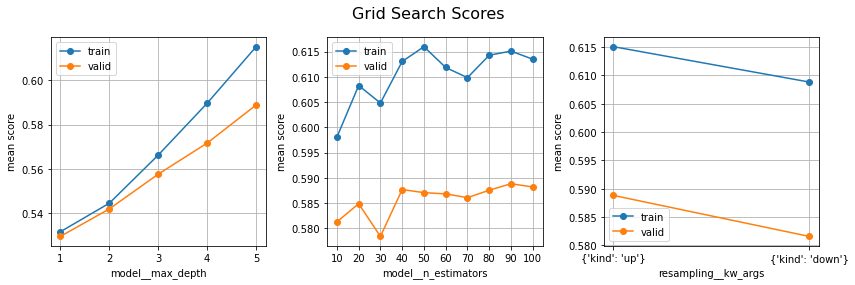

In [72]:
# Plot grid search train and validation scores
plot_gridsearch_results(grid_rf_resamp)

Как и в случае с регрессией разница между "увеличением" и "уменьшением" минимальна, в остальном результаты схожи с "базовой" моделью. Посмотрим относительную важность признаков: 

In [73]:
# Show feature importances
pd.Series(grid_rf_resamp.best_estimator_.named_steps.model.feature_importances_, 
          index=feature_names).sort_values(ascending=False) 

Age                 0.33
NumOfProducts_2     0.28
IsActiveMember_1    0.10
NumOfProducts_3     0.08
Geography_Germany   0.07
Balance             0.07
Gender_Male         0.02
NumOfProducts_4     0.02
CreditScore         0.01
EstimatedSalary     0.01
Tenure              0.01
Geography_Spain     0.00
HasCrCard_1         0.00
TenureNan_1         0.00
dtype: float64

По сравнению со взвешиванием отличии минимальны. Проверим метрики на валидационной выборке: 

In [74]:
# Make predictions for validation dataset
y_pred = grid_rf_resamp.predict(X_valid)

# Generate classification report for validation dataset
class_report_rf_resamp = classification_report(y_valid, y_pred, 
                                               target_names=['Stayed', 'Exited'])
print(class_report_rf_resamp)

              precision    recall  f1-score   support

      Stayed       0.93      0.80      0.86      1551
      Exited       0.50      0.77      0.60       400

    accuracy                           0.79      1951
   macro avg       0.71      0.78      0.73      1951
weighted avg       0.84      0.79      0.81      1951



Метрика F1 ниже, чем в случае изменения порога и взвешивания, но в остальном метрики ближе ко второму методу (взвешивание) - относительно высокая полнота, при относительно низкой точности. Посмотрим матрицу ошибок:

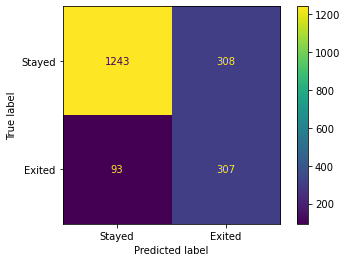

In [75]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_valid, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Все соответствует результатам "классификационного отчета". Проверим площадь под ROC-кривой: 

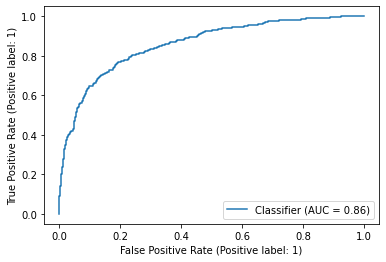

In [76]:
# Predict probabilities
prob_valid = grid_rf_resamp.predict_proba(X_valid)

# Compute area under ROC (for summary table below)
auc_roc_rf_resamp = roc_auc_score(y_valid, prob_valid[:, 1])

# Plot ROC curve
RocCurveDisplay.from_predictions(y_valid, prob_valid[:, 1])
plt.show()

Такая же, как и для "базовой" модели (о возможных причинах см. выше). В заключение соберем основные метрики рассмотренных в этом разделе моделей в одну таблицу:

In [77]:
# Create summary table with validation results
validation_summary = pd.DataFrame(np.zeros(shape=(6, 4)), 
                                  index = ['lr_thres', 'lr_weight', 'lr_resamp', 
                                           'rf_thres', 'rf_weight', 'rf_resamp'],
                                  columns=['precision', 'recall', 'f1', 'auc_roc'])

# Fill in the table
for index, model in enumerate(validation_summary.index):    
    class_report = eval('class_report_' + model)
    validation_summary.loc[model, ['precision', 'recall', 'f1']] = [
        float(x) for x in class_report.splitlines()[3].split()[1:4]]    
    try:        
        validation_summary.loc[model, ['auc_roc']] = eval('auc_roc_' + model)        
    except:
        validation_summary.loc[model, ['auc_roc']] = None

#### 3.2.3 Выводы

В этом разделе мы рассмотрели несколько методов борьбы с дисбалансом применив их к моделям логистической регрессии и случайного леса. Выведем основные метрики полученные нами на валидационной выборке в каждом случае: 

In [78]:
# Print the table
display(validation_summary)

,precision,recall,f1,auc_roc
lr_thres,0.53,0.64,0.58,NaN
lr_weight,0.45,0.76,0.57,0.83
lr_resamp,0.45,0.76,0.56,0.83
rf_thres,0.60,0.64,0.62,NaN
rf_weight,0.53,0.74,0.62,0.86
rf_resamp,0.50,0.77,0.60,0.86


В целом нам удалось улучшить качество моделей по сравнению с "базовыми". Однако, только для случайного леса мы достигли и превысили минимальное значение целевой метрики. При этом, лучший результат показали случайный лес с изменением порога и взвешиванием. Заметим однако, что в случае последнего результат на обучающей выборке был немного хуже, и возможно нам просто "повезло" с валидационной выборкой. Тем не менее, если обе модели пройдут тестирование в следующем разделе, то мы рекомендуем представить обе модели банку, так как имея относительно разное соотношение метрик полноты и точности, окончательный выбор той или иной модели можно сделать только с учетом понимания фактического соотношения расходов на удержание и привлечение клиентов.

Также отметим, что площадь под ROC-кривой не отличается от "базовых" моделей, что вероятно связано с тем, что применяя различные методы борьбы с дисбалансом мы перемещаемся вдоль этой кривой, а не изменяем ее (так как не добавляем новой информации).

## 4. Тестирование модели

Итак, мы решили протестировать две модели, начнем с "базового" случайного леса с настройкой порога, но сначала объединим обучающую и валидационную выборки, чтобы переобучить модели:  

In [79]:
# Concatinate train and validation subsets
X_train = pd.concat([X_train] + [X_valid])
y_train = pd.concat([y_train] + [y_valid])

Теперь переобучим модель и найдем оптимальный порог на обучающей выборке:

Train. Max F1: 0.63, Threshold: 0.3
Test. Max F1: 0.63, Threshold: 0.29


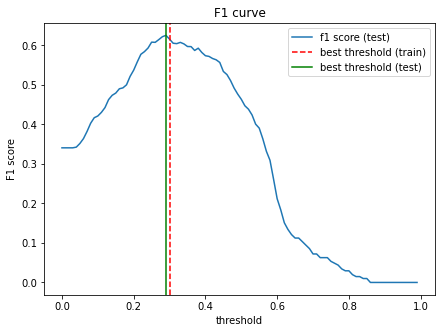

CPU times: total: 10.5 s
Wall time: 1min 35s


In [80]:
%%time
# Re-fit random forest
grid_rf.fit(X_train, y_train)

# Predict probabilities for train and validation sets
prob_train = grid_rf.predict_proba(X_train)
prob_test = grid_rf.predict_proba(X_test)

# Calculate F1 values for different thresholds
f1_train, threshold_train = f1_curve(y_train, prob_train[:, 1], 
                                     step=0.01)
f1_test, threshold_test = f1_curve(y_test, prob_test[:, 1], 
                                     step=0.01)

# Compute thresholds for max f1 metric
threshold_rf_train = threshold_train[np.argmax(f1_train)]
threshold_rf_test = threshold_test[np.argmax(f1_test)]

# Print max F1 score and corresponding threshold
print(f"Train. Max F1: {max(f1_train):.2f}, Threshold: {threshold_rf_train}")
print(f"Test. Max F1: {max(f1_test):.2f}, Threshold: {threshold_rf_test}")

# Plot F1 curve
plt.figure(figsize=(7, 5))
plt.plot(threshold_test, f1_test, label='f1 score (test)')
plt.axvline(x=threshold_rf_train, linestyle='--', 
            color='red', label='best threshold (train)')
plt.axvline(x=threshold_rf_test, linestyle='-', 
            color='green', label='best threshold (test)')
plt.xlabel('threshold')
plt.ylabel('F1 score')
plt.legend() 
plt.title('F1 curve')
plt.show()

Отличие оптимального порогового значения на обучающей и тестовой выборках небольшое, вероятно мы получим метрику больше минимального требуемого значения, проверим: 

In [81]:
# Make predictions for validation dataset
y_pred = (prob_test[:, 1] >= threshold_rf_train).astype(bool)

# Generate classification report for validation dataset
class_report_rf_thres = classification_report(y_test, y_pred, 
                                              target_names=['Stayed', 'Exited']) 
print(class_report_rf_thres)

              precision    recall  f1-score   support

      Stayed       0.90      0.92      0.91      1551
      Exited       0.65      0.59      0.62       401

    accuracy                           0.85      1952
   macro avg       0.77      0.75      0.76      1952
weighted avg       0.84      0.85      0.85      1952



Метрика F1 такая же, как и на валидационной выборке, что неплохо. Однако, соотношение между полнотой и точностью поменялось, полнота снизилась, а точность выросла. Посмотрим на матрицу ошибок:

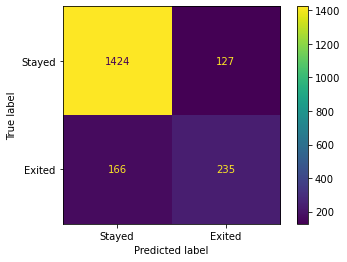

In [82]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

Количество правильно определенных "ушедших" снизилось примерно на 10%, а количество "ушедших", попавших в другой класс выросло на 15%. При этом, количество "оставшихся", попавших в "чужой" класс, снизилось на 35%. Довольно большие колебания. Проверим вторую модель:

In [83]:
%%time
# Refit weighted random forest
grid_rf_weight.fit(X_train, y_train)

# Make predictions for test dataset
y_pred = grid_rf_weight.predict(X_test)

# Generate classification report for test dataset
class_report_rf_weight = classification_report(y_test, y_pred, 
                                               target_names=['Stayed', 'Exited'])
print(class_report_rf_weight)

              precision    recall  f1-score   support

      Stayed       0.92      0.78      0.85      1551
      Exited       0.47      0.73      0.57       401

    accuracy                           0.77      1952
   macro avg       0.69      0.76      0.71      1952
weighted avg       0.83      0.77      0.79      1952

CPU times: total: 6.39 s
Wall time: 1min 37s


Похоже нам все-таки "повезло" с валидационной выборкой, результат на тестовой заметно ниже и не удовлетворяет минимальному требуемому критерию. Тем не менее посмотрим матрицу ошибок:

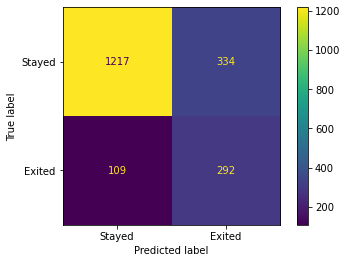

In [84]:
# Show confusion matrix for test dataset
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                       display_labels=['Stayed', 'Exited']).plot()
plt.show()

По сравнению с предыдущей моделью (настройка порога) количество правильно определенных "ушедших" значительно выросло (на 25%), а количество "ушедших", попавших в "чужой" класс снизилось (более чем на 30%), конечно за счет значительно выросшего количества "оставшихся", определенных, как "ушедших" (рост более чем на 100%). Учитывая, что мы не достигли минимальной требуемой метрики, модель мы конечно принять не можем. Однако, еще раз отметим, что при определенных условиях банку может быть выгодней удерживать, как можно большую долю, действительно собирающихся уйти клиентов, закрывая при этом глаза на то, что часть средств на удержание расходуется на клиентов, которые и не собирались уходить.   

### 4.1 Выводы

Мы протестировали две модели - случайный лес с оптимизированным порогом и случайный лес со взвешенными классами. Только первая модель успешно прошла тестирование, достигнув значения F1-метрики 0.62 (такого же, как и на валидационной выборке). Вторая модель, показала значение метрики 0.57, что значительно ниже метрики достигнутой на валидационной выборке и ниже минимального требуемого порога метрики F1. Таким образом, мы можем рекомендовать для дальнейшего использования только первую модель. Однако, отметим, что с точки зрения банка соотношение между полнотой и точностью, показываемое этой моделью, может быть неоптимально (даже по сравнению с моделями с более низкой F1-метрикой).  

## 5. Общий вывод

В данной работе мы попытались построить модель бинарной классификации для целей определения клиентов, которые собираются уйти из банка, с максимально большим значением метрики F1 (но не менее 0.59). Для целей проекта мы использовали данные о поведении 10 тыс. клиентов и расторжении ими договоров с банком (целевой признак). На этапе обзора данных мы обнаружили, что классы целевого признака несбалансированы (расторгли договор с банком только около 20% клиентов, представленных в выборке), а также пропущенные и аномальные значения. После предобработки данных, выбора оптимальной модели с учетом, и без учета дисбаланса и тестирования мы пришли к следующим выводам:

- Без учета дисбаланса ни одна из рассмотренных нами моделей (логистическая регрессия и случайный лес) не смогла достичь минимальной требуемой метрики;
- После корректировки с учетом дисбаланса в том числе при помощи изменения порога, взвешивания и "уменьшения" / "увеличения" выборки, все модели показали улучшение метрики F1 (от 5% до 30%);
- Однако, только случайный лес показал метрики превышающие минимальное требуемое значение на валидационной выборке:

In [85]:
# Print the table
display(validation_summary)

,precision,recall,f1,auc_roc
lr_thres,0.53,0.64,0.58,NaN
lr_weight,0.45,0.76,0.57,0.83
lr_resamp,0.45,0.76,0.56,0.83
rf_thres,0.60,0.64,0.62,NaN
rf_weight,0.53,0.74,0.62,0.86
rf_resamp,0.50,0.77,0.60,0.86


- Также отметим, что площадь под ROC-кривой для всех моделей значительно превышает 0.5, что говорит о том, что они не случайны;
- Учитывая, что две модели (случайный лес с оптимизированным порогом и случайный лес со взвешенными классами) показали максимальную метрику на валидационной выборке, мы решили протестировать обе;
- Однако, только случайный лес с оптимизированным порогом прошел тестирование показав такую же метрику F1, как и на валидационной выборке (0.62);
- При этом, заметим, что значение полноты и точности при валидации и тестировании модели колебалось в диапазонах 0.60 - 0.65 (точность) и 0.59 - 0.64 (полнота);
- Также заметим, что в зависимости от соотношения фактических расходов на удержание существующих и привлечение новых клиентов, полученные диапазоны полноты и точности могут быть не оптимальны с точки зрения банка.